In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense 
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist 
import matplotlib.pyplot as plt

In [3]:
# Load and Prepare Data
(x_train, y_train), (x_test, y_test) = mnist.load_data() 
x_train, x_test = x_train / 255.0, x_test / 255.0

In [5]:
# Build the CNN Model 
model = Sequential([
Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
MaxPooling2D((2, 2)),
Conv2D(64, (3, 3), activation='relu'),
MaxPooling2D((2, 2)), Flatten(),
Dense(64, activation='relu'), Dense(10, activation='softmax')
])

In [6]:
# Compile and Train the Model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']) 
history	=	model.fit(x_train.reshape(-1,	28,	28,	1),	y_train,	epochs=5,	batch_size=64,
validation_data=(x_test.reshape(-1, 28, 28, 1), y_test))

Epoch 1/5
938/938 [==============================] - 16s 17ms/step - loss: 0.1740 - accuracy: 0.9477 - val_loss: 0.0533 - val_accuracy: 0.9839
Epoch 2/5
938/938 [==============================] - 15s 16ms/step - loss: 0.0505 - accuracy: 0.9850 - val_loss: 0.0502 - val_accuracy: 0.9831
Epoch 3/5
938/938 [==============================] - 16s 17ms/step - loss: 0.0372 - accuracy: 0.9888 - val_loss: 0.0387 - val_accuracy: 0.9862
Epoch 4/5
938/938 [==============================] - 16s 17ms/step - loss: 0.0284 - accuracy: 0.9908 - val_loss: 0.0317 - val_accuracy: 0.9896
Epoch 5/5
938/938 [==============================] - 16s 18ms/step - loss: 0.0212 - accuracy: 0.9932 - val_loss: 0.0336 - val_accuracy: 0.9887


In [7]:
# Evaluate the Model
test_loss, test_acc = model.evaluate(x_test.reshape(-1, 28, 28, 1), y_test) 
print(f'Test accuracy: {test_acc:.4f}')

313/313 [==============================] - 1s 4ms/step - loss: 0.0336 - accuracy: 0.9887
Test accuracy: 0.9887


313/313 [==============================] - 1s 4ms/step


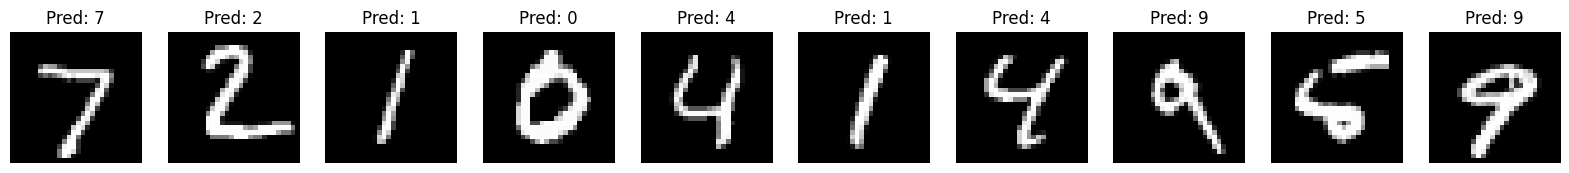

In [8]:
# Predictions and Visualization
predictions = model.predict(x_test.reshape(-1, 28, 28, 1))
plt.figure(figsize=(20, 4)) 
for i in range(10):
    ax = plt.subplot(2, 10, i + 1) 
    plt.imshow(x_test[i], cmap='gray') 
    ax.axis('off')
    ax.set_title(f'Pred: {predictions[i].argmax()}') 
plt.show()